## <font color = red> Please fill up the asked information!
    
<font color = teal>Name: Konsta Nyman

<font color = teal>Student number: 523834

<font color = teal>Mail: kokany@utu.fi

------

# Data Analysis and Knowledge Discovery: Exercise 2, Supervised learning

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about the data, so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM), which is <font color = green>modeling</font>.

The questions to be answered at this stage could include:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve its performance?
- How do we evaluate the model's performance?

<i>Machine learning</i> is a subfield of artificial intelligence that provides automatic, objective and data-driven techniques for modeling the data. Its two main branches are <i>supervised learning</i> and <i>unsupervised learning</i>, and in this exercise, we are going to use the former, <font color = green>supervised learning</font>, for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format so that models can learn from it. Even though we are not conducting any major data exploration nor data preparation this time, <i>you should <b>never</b> forget it in your future data analyses</i>.

-----

<b>General guidance for exercises</b>

- Answer <b>all</b> questions below, even if you can't get your script to fully work.
- Write clear and easily readable code, and include explanations what your code does.
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots.
- You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- <b>A complete submission includes a working notebook</b>, so it's highly recommended to run "Restart & Run all" before the final save. Remember to submit BOTH versions of the exercise (ipynb AND html/pdf). 
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
    - Passing requires that <b>the parts 1-5</b> are completed.
    - +1 bonus point (grading *Pass with honors*) requires a <b>completely</b> correct solution and also thorough analysis.
- If you encounter problems, Google first. Always give the credit where it belongs so please <b>cite your sources, whether you're referencing text or code</b>. You will learn so much more when you have to research and summarize information in your own words. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via email (tuhlei@utu.fi).
- Note! Don't leave it to the last moment! No feedback service during weekends.
- <b>We do not encourage the use of ChatGPT or similar models</b>, but if you choose to do so, always be critical of the outputs and try to comprehend them before any use. Also, make a brief description how you utilized the model (what was your input and how did you benefit from the output).


<font color = green> The guided exercise session is held on the 28th of November at 14:15-16:00, at TSE Elovena-Sali.</font>

<font color = red size = 4><b>The deadline is the 30th of November at 23:59</b></font>. Late submissions will not be accepted unless there is a valid excuse for an extension which should be asked **before** the original deadline.


------

### Gather all packages needed for this notebook here:

You can use other packages as well, but this excercise can be completed with those below.

In [1]:
import random

import numpy as np
import pandas as pd

# Visualization packages - matplotlib and seaborn
# Remember that pandas is also handy and capable when it comes to plotting!
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge, LinearRegression

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is one of the classic supervised machine learning algorithms which assumes that similar points are close to each other. 

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`.

But first, we need data for the task. The code for loading the data into the environment is provided for you. The code should work but make sure that you have the CSV file of the data in the same directory where you have this notebook file.

**Exercise 1 A)**

Take a random sample of 1500 rows from the dataframe using your student id as a seed. Print the first 15 rows to check that everything is ok with the dataframe.

*Note: as mentioned, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's also a new variable, gluc (about glucose levels), which is one-hot-encoded for you. It has similar values as cholesterol originally had [normal, at risk, elevated].*


In [2]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Read the CSV file 
cardio_data = pd.read_csv(data_path)

In [3]:
### Code - Resample and print 15 rows

df_sample = cardio_data.sample(n=1500, random_state=523834)
df_sample.head(15)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_elevated,cholesterol_high,gluc_normal,gluc_elevated,gluc_high
3378,50,1,160,76.0,130,85,0,0,1,0,1,0,0,0,1,0
761,55,1,158,56.0,120,80,0,0,1,0,1,0,0,1,0,0
410,43,2,170,65.0,120,80,0,0,0,0,1,0,0,1,0,0
4355,59,2,170,80.0,140,90,0,0,1,1,1,0,0,1,0,0
5765,64,1,167,60.0,130,80,0,0,0,1,1,0,0,1,0,0
760,50,2,165,71.0,120,80,0,0,1,0,1,0,0,1,0,0
2362,63,1,155,70.0,140,80,0,0,0,0,1,0,0,1,0,0
372,41,2,172,63.0,110,80,0,1,1,0,1,0,0,1,0,0
3077,52,2,166,70.0,120,80,1,1,1,0,0,0,1,1,0,0
5470,53,1,165,65.0,110,70,0,0,1,1,1,0,0,1,0,0


----

We have the data so now, let's put it to use. 

To teach the k-NN algorithm (or any other machine learning algorithm) to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. The term "split" is there because we literally split the data into two sets.

**Exercise 1 B)**

Collect the features as an array named `features`, and the target variable as an array named `labels`. Create training and test data by randomly splitting the data into training (80%) and test (20%) sets.

- Do you need stratification for our dataset? Explain your decision.

In [4]:
### Code - Train-test split

# features
features = df_sample.drop('cardio', axis=1).values

# target variable
labels = df_sample['cardio'].values

# print distribution of variable 'cardio'
print(f"The split of variable 'cardio': \n{df_sample['cardio'].value_counts()}")

# split data according to instructions (80/20)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=523834)

The split of variable 'cardio': 
cardio
0    1044
1     456
Name: count, dtype: int64


<font color = lightcoral>I think it is useful to use stratification in this case since the distribution of cardio is not very evenly split.</font>

----------

**Exercise 1 C)** 

Standardize the numerical features: Note that you should now have two separate features that you've divided all the features into.

- Describe how the k-NN model would make predictions about whether or not a patient has a CVD when the features are not standardized, and explain the reasons behind.


*Note: Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html*.

In [5]:
### Code - Standardization

# standardize both training and test features
scaler = StandardScaler().fit(features_train) #fit the scaler
features_train = scaler.transform(features_train) #normalize training data
features_test = scaler.transform(features_test) #normalize test data

<font color = lightcoral>The k-NN model would depend pretty much only on the features with larger scales; so the weight of the person would automatically matter more than whether person smokes or not. In the scale of tens or hundreds it doesn't matter whether the value is 0 or 1. K-NN is especially sensitive to wrongly scaled data.</font>

-------

It's time for us to train the model!

**Exercise 1 D)**

Train a k-NN model with $k=3$. Print out the confusion matrix and use it to compute the accuracy, the precision and the recall.
- What does each cell in the confusion matrix represents in the context of our dataset?
- How does the model perform with the different classes? Where do you think the differences come from? Interpret the performance metrics you just computed.
- With our dataset, why should you be a little more cautious when interpreting the accuracy?

In [6]:
### Code - the kNN classifier

# k-NN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# fit model
knn_model.fit(features_train, labels_train)

# predict test set results
labels_pred = knn_model.predict(features_test)

# print confusion matrix
cm = metrics.confusion_matrix(labels_test, labels_pred)
cm = cm[::-1, ::-1] #get correct layout for the matrix (from ChatGPT)

print(f"Confusion matrix:\n{cm}\n")

# initialize variables for clarity
tp = cm[0,0]
fp = cm[1,0]
fn = cm[0,1]
tn = cm[1,1]

# print accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
print(f"Accuracy:\n{acc}\n")

# print precision
prec = tp/(tp+fp)
print(f"Precision:\n{prec}\n")

# print recall
rec = tp/(tp+fn)
print(f"Recall:\n{rec}")

Confusion matrix:
[[ 37  54]
 [ 29 180]]

Accuracy:
0.7233333333333334

Precision:
0.5606060606060606

Recall:
0.4065934065934066


<font color = lightcoral>The confusion matrix method from sklearn.metrics returns a matrix where true positives is C_{1,1}, true negatives is C_{0,0}, false positives is C_{0,1} and false negatives is C_{1,0}. I turned it to correspond to commonly used layout. True positives are the true values that the prediction predicted correctly. True negatives are the false values that the prediction predicted correctly. False positives are false values that the prediction predicted as true. False negatives are true values that the prediction predicted to be false. (Seems to be that the lecture used rows as predictions and columns as actual values, but everywhere else it seems to be the other way round)

The model seems to get negative values correct more often in comparison to positive values. The latter of these two values is recall. We can see that the model detected only 41% of the positive values. 

It is way more valuable in this kind of dataset to have a high recall than an accuracy. Since most of the actual values are negative, a model that would guess 'negative' for all values would have quite a good accuracy but a recall of 0. It is also morally better to be able to indentify the true positive cases with a few miss hits in the false positive side, because it is less of a harm to miss-identify someone with a possibility of cardiac disease even if they don't have it, than it is to miss-identify someone with an actual cardiac disease.</font>

---------------

You randomly divided the data into two sets, one for training the k-NN model and the other for evaluating its performance. However, randomness is not the thing we really need, and in fact, it's not something we even desire. Instead, what we do want is to keep track of each step we're making and exporing. This said, the *reproducibility* of the results is extremely important in research. To achieve this, we can utilize <font color = lightcoral> a random seed</font>, with which we can re-run the codes and get the exact same results than before.

For example, we can use a fixed seed when we're shuffling the data before splitting it into training and test sets. This ensures that when we're re-runing the code, we obtain exactly the same partitions of the data in each split.

**Exercise 1 E)**

Initialize 1000 random seeds and continue with the k-NN model ($k=3$): Perform 1000 different train-test splits using these seeds and store the accuracies from each split. Plot the accuracies in a histogram, and discuss your results.

*Tip: You can add the accuracy from the previous exercise in the plot by drawing a vertical line with the function `matplotlib.axes.Axes.axvline(<accuracy>)` if you want!*

In [7]:
### Code - Initialization of the 1000 fixed seeds

seeds = random.sample(range(0, 999999), 1000)

In [8]:
### Code - 1000 different train-test-splits

# intialize accuracy list
acc_list = []

for seed in seeds:

    # split data according to instructions (80/20)
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=seed)

    # standardize both training and test features
    scaler = StandardScaler().fit(features_train) #fit the scaler
    features_train = scaler.transform(features_train) #normalize training data
    features_test = scaler.transform(features_test) #normalize test data

    # k-NN model
    knn_model = KNeighborsClassifier(n_neighbors=3)

    # fit model
    knn_model.fit(features_train, labels_train)

    # predict test set results
    labels_pred = knn_model.predict(features_test)

    # calculate accuracy
    accuracy = metrics.accuracy_score(labels_test, labels_pred)

    # add accuracy to list
    acc_list.append(accuracy)

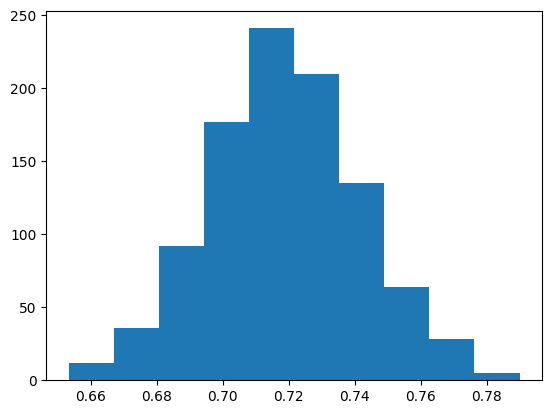

In [9]:
# plot the accuracies
plt.hist(acc_list)
plt.show()

<font color = lightcoral>Accuracies are around 0.72 so the accuracy of 0.72 of the last exercise fits nicely in this plot.</font>

------

One really common evaluation metric is <font color = lightcoral>the area under the receiver operating characteristic (AUROC, AUC or AUC-ROC)</font>.  It provides a measure of a model's ability to distinguish between classes, especially in binary classification tasks between the <i>positive class</i> and the <i>negative class</i>. (There sure are multiclass and multilabel cases too, but they are out of scope here.) 

In our case, individuals who have a CVD form the positive class. As the name of the measure suggests, it combines two keys aspects to interpret a model's performance: ROC curves are about the trade-off between the true positive rate and the false positive rate, the former representing the model's ability to correctly identify individuals with a CVD (true positives) and the latter measuring the model's tendency to incorrectly classify individuals without a CVD as if they have the disease (false positives). Thus, the area beneath the curve is simply the AUROC, a single numerical value, that summarizes the overall performance.

**Exercise 1 F)** 

Evaluate the performance of the trained k-NN model by computing the AUROC and plotting the related curve. Draw also the line for random guesses.

- How well does the k-NN model perform in distinguishing between healthy individuals and those with a CVD?

*Tip: You should not use the predicted labels in this exercise.*

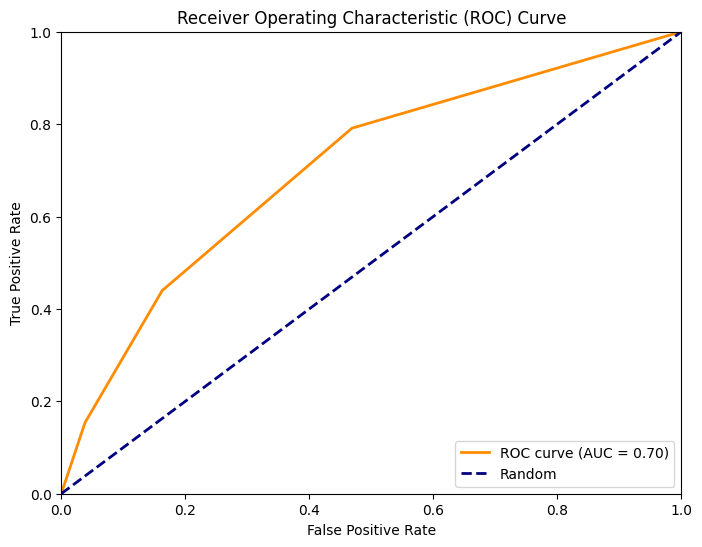

In [10]:
### Code - ROC curve and AUROC

# get decision scores on the test set
decision_scores = knn_model.predict_proba(features_test)[:, 1]

# get true and false positive rates
fpr, tpr, thresholds = metrics.roc_curve(labels_test, decision_scores)

# calculate AUROC
auroc = metrics.auc(fpr, tpr)

# plot ROC curve (some formatting from ChatGPT)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auroc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='dashed', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<font color = lightcoral>The model is not great in guessing CVD. It is better than at guessing at random.</font>

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

While the train-test split may provide us with an unbiased estimate of the performance, we only evaluate the model once. Especially when dealing with small datasets, a test set itself will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = royalblue>cross-validation</font>. With its help, we can split the dataset into multiple different training and test sets, which allows us to evaluate models across various data partitions. This time, we'll take a closer look at the <font color = royalblue>leave-one-out cross-validation</font>.

**Exercise 2**

Let's keep the focus on detecting the CVD, so once again we utilize the k-NN model (with $k=3$) to predict the precense of the disease. Now, apply leave-one-out cross-validation to assess whether the k-NN model is suitable for addressing the problem. You may use the entire dataset on this task.

- What can you say about the accuracy compared to the previous task?
- What do you think: Does the k-NN model work for the problem in hand? Explain your answer.

*Tip: This sure can be done manually, but `cross_val_score` is quite a handy function too.*

In [11]:
### Code - Leave-one-out cross-validation

# standardize features
scaler = StandardScaler().fit(features) #fit the scaler
features = scaler.transform(features) #normalize training data

# cross-validation scores
loo = LeaveOneOut()
scores = cross_val_score(knn_model, features, labels, cv=loo)
scores

array([0., 1., 1., ..., 0., 1., 1.])

In [12]:
loo_acc = scores.mean()
loo_acc

0.708

<font color = royalblue>The scores array contains the values whether the cross-validation predicted correctly or not. By counting the mean of the array we get a percentage of correct guesses which is the accuracy. The accuracy is once again very similar compared to the ones before.

The k-NN model works in this case, I think. One instance is looked at at a time and then three closest neighbors are inspected and detected, whether they are positive or negative.</font>

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's explore that possibility through a process known as <font color=green>hyperparameter tuning</font>. The cross-validation is especially important tool for this task. Note here, that model selection and model evaluation (or assessment) are two different things: We use model selection to estimate the performance of various models to identify the model which is most likely to provide the "best" predictive performance for the task. And when we have found this most suitable model, we *assess* its perfomance and generalisation power on unseen data.

This time, we're going to train multiple models, let's say 30, and our goal is to select the best K-Nearest Neighbors model from this set. Most models come with various hyperparameters that require careful selection, and the k-NN model is no exception. Although we're talking about the number of neighbors here, it's important to note that k-NN also has several other hyperparameters. However, for the sake of simplicity, this time we'll focus solely on fine-tuning the number of nearest neighbors, that is, the value of k. 

Let's focus on the model selection part here for the sake of comprehending the cross-validation itself. We'll get later on the whole pipeline, which also includes model assessment.

**Exercise 3**

Find the optimal k value from a set of $k=1...30$ using leave-one-out cross-validation. Plot the accuracies vs. the k values. Again, you may use the entire dataset.

- Which value of k produces the best accuracy when using leave-one-out cross-validation? Compare the result to the previous model with $k=3$.
- If the number of k is still increased, what is the limit that the accuracy approaches? Why?
- Discuss the impact of choosing a very small or very large number of neighbors on the k-NN model's ability to distinguish between the healthy individuals and the ones with CVD.

In [13]:
### Code - Select best model

loo_accuracies = []

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, features, labels, cv=loo)
    loo_accuracies.append(score.mean())

Text(0, 0.5, 'Accuracy Score')

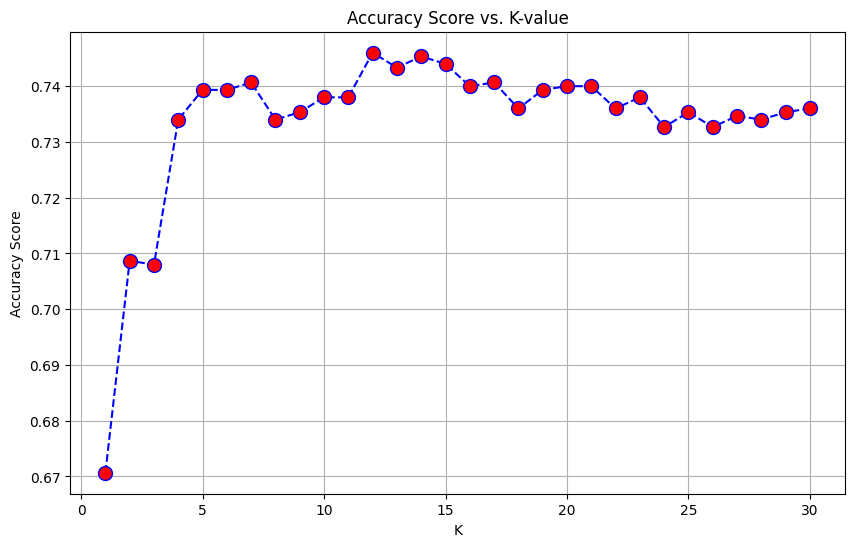

In [14]:
### Code - Plot the accuracies vs. the values for k

plt.figure(figsize=(10,6))
plt.plot(range(1,31), loo_accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Score vs. K-value')
plt.grid()
plt.xlabel('K')
plt.ylabel('Accuracy Score')

<font color = green>It seems that k-value of 12 performs the best. It has an accuracy of over 0.74 while k-value of 3 had only under 0.71.

The accuracy seems to steady at around 0.73. At some point the accuracy would decrease, because is too many neighbors are taken into consideration, any clutters would eventually mix and the classification would fail. For example, if k = n, every occurance would be predicted as negative since the majority of the occurances are negative.

A very small k-value allows more randomness and chance and therefore, doesn't detect CVD very accurately. A too large k-value can form many false negative predictions since most values in the data are negative.</font>

________________
## <font color = red>  4. Training and testing on the same dataset </font>

<i>Note that this should never be done outside of this exercise! You have been warned.</i>

Oh, but what if we just trained a model using the *entire* dataset? Wouldn't we like to use as much data as possible to discover the underlying patterns in the data so why not to use all of it?

**Exercise 4**

This is quite straightforward: Train 30 k-NN models ($k = 1...30$ ) using the whole dataset and evaluate the trained models using, again, the whole dataset. Create a plot that displays the accuracies against the corresponding k values. Include the accuracy values from the previous task in the same figure.

- What's the optimal value for k now and why's that? How would you interpret the reliability of the predictions?
- Explain why you should never use the same dataset for training and testing.

In [15]:
### Code - Train with whole data

same_accuracies = []

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)

    # fit model
    knn.fit(features, labels)

    # predict test set results
    labels_pred = knn.predict(features)

    # calculate accuracy
    accuracy = metrics.accuracy_score(labels, labels_pred)

    # add accuracy to list
    same_accuracies.append(accuracy)


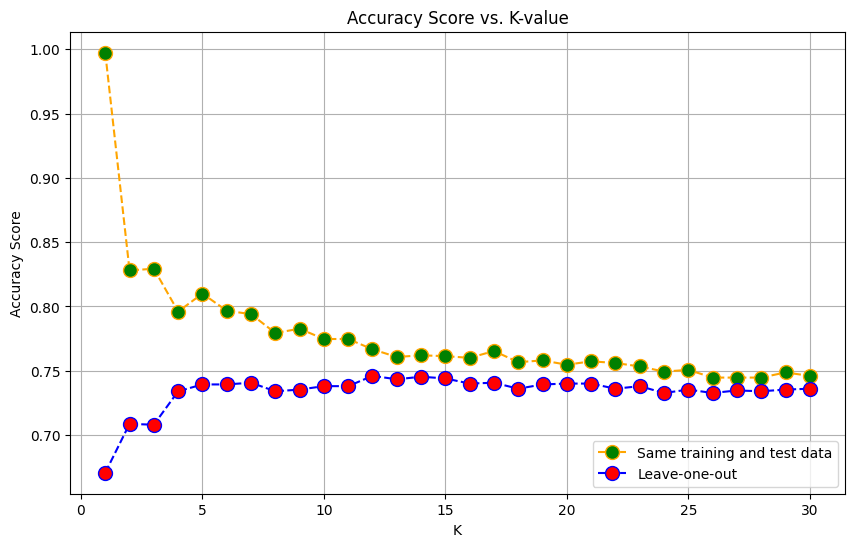

In [16]:
### Code - Plot results

plt.figure(figsize=(10,6))
plt.plot(range(1,31), same_accuracies, color='orange', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10, label='Same training and test data')
plt.plot(range(1,31), loo_accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10, label='Leave-one-out')
plt.title('Accuracy Score vs. K-value')
plt.grid()
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.legend(loc="lower right")
plt.show()

<font color = red>The optimal value is clearly 1, with accuracy of 100%. Every occurance is its own nearest neigbour when they them selves are a part of the training data so predictions are always correct. The predictions are not reliable at all in this case. The predictions are heavily affected by themselves in the training data when k-value is small. When k-value is larger it doesn't matter as much, but the accuracy is still crooked by a few percent.

Using testing data as training data always compromises the reliability of the predictions. Usually the model performs exceptionally when tested with the same data, but when it is tried on a different data set it often performs poorly. These models are about generalizing a problem to different data sets and testing the model with the same data it was trained with gives biased evaluation scores.</font>

_____________________

## <font color = darkorange> 5. Comparison of ridge regression and k-NN regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression - as we are changing our main goal from predicting discrete classes (healty/sick) to estimating continuous values. The following exercises are going to involve utilizing two different regression models, <font color = darkorange>Ridge Regression</font> and <font color = darkorange>K-Nearest Neighbors (k-NN) Regression</font>, and our goal is to evaluate and compare the performances of these two models. 

Let's change the dataset to make the following exercises more intuitive. The new dataset is about brushtail possums and it includes variables such as

- <b>sex</b>: Gender, either male (0) or female (1)
- <b>age</b>: Age in years
- <b>len_head</b>: Head length in cm
- <b>width_skull</b>: Skull width in mm
- <b>len_total</b>: Total length in cm
- <b>len_tail</b>: Tail length in cm
- <b>len_foot</b>: Foot length 
- <b>len_earconch</b>: Ear conch length 
- <b>width_eye</b>: Distance from medial canthus to lateral canthus of right eye, i.e., eye width
- <b>chest</b>: Chest grit in cm
- <b>belly</b>: Belly grit in cm

In this case, our target variable will be *the age of the possum*. The data for this exercise has been modified from the original source.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [17]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_possum_data.csv'

# Load the data 
possum_data = pd.read_csv(data_path)
print(len(possum_data))
possum_data.head()

101


,sex,age,len_head,width_skull,len_earconch,width_eye,len_foot,len_tail,chest,belly,len_total
0,0,8.0,94.1,60.4,54.5,15.2,74.5,36.0,28.0,36.0,89.0
1,1,6.0,92.5,57.6,51.2,16.0,72.5,36.5,28.5,33.0,91.5
2,1,6.0,94.0,60.0,51.9,15.5,75.4,39.0,30.0,34.0,95.5
3,1,6.0,93.2,57.1,52.2,15.2,76.1,38.0,28.0,34.0,92.0
4,1,2.0,91.5,56.3,53.2,15.1,71.0,36.0,28.5,33.0,85.5


-----------

Regression allows us to examine <font color = darkorange>relationships between two or more variables</font>. This relationship is represented by an *equation*, which itself represents how a change in one variable affects another on average. For example, we could examine how a change in possum's total length affects, on average, its estimated age.

We start by examing those relationships between the variables in the given dataset.


**Exercise 5 A)**

Plot pairwise relationships between the age variable and the others where you color the samples based on the sex variable. 

- Which body dimensions seem to be most correlated with age? And are there any variables that seem to have no correlation with it?
- Are there any differences in the correlations between males and females?

*Tip: `seaborn.pairplot()` is handy with the parameters `(x,y)_vars` and `hue`. You actually can fit a linear model to draw a regression line with the parameter `kind` set to `"reg"`.*

c:\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


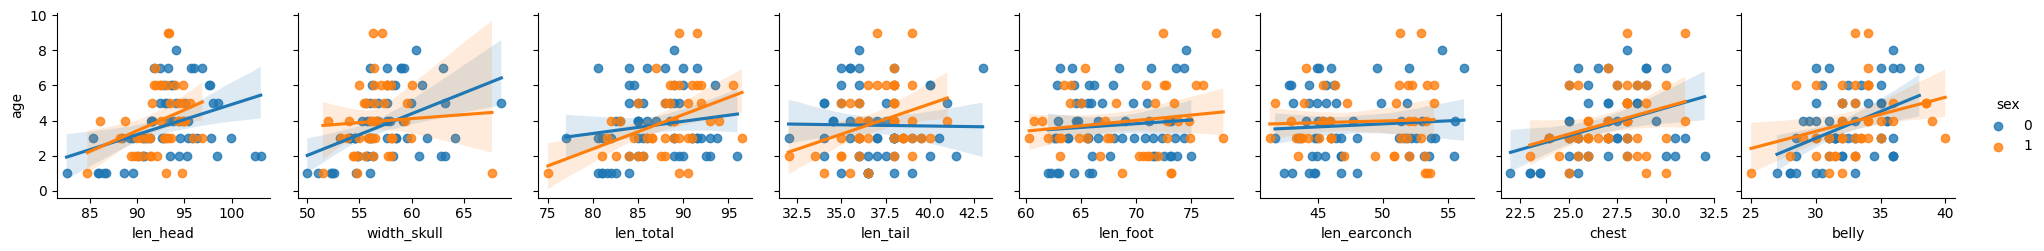

In [18]:
### Code - Pairplot

# features
pos_feature_names = ['len_head', 'width_skull', 'len_total', 'len_tail', 'len_foot', 'len_earconch', 'chest', 'belly']

# target
pos_target_name = ['age']

# plot
sns.pairplot(data=possum_data, x_vars=pos_feature_names, y_vars=pos_target_name, hue='sex', kind='reg')

<font color = darkorange>Belly and chest width and the length of the head seem to be most correlated with age in both genders. It seems like the length of the tail ond the total length are positively corralated with age in female possums but not really in males. And contrarily, the width of the head is sharply correlated in males, but not females. Foot length and ear conch length don't seem to have pretty much any corralation.

------

Before the regression analysis itself, let's check that our dataset is in a proper format. We'll also perform the train-test split as we're going to first tune the hyperparameters for each model using the training set and test the overall performance of the chosen models using the test set.

**Exercise 5 B)**

Do you need to prepare the data a little? Explain your decision. Perform the train-test (80/20) split. 

In [19]:
### Code - Data preparation

# duplicate each row
dup_possum_data = pd.DataFrame(np.repeat(possum_data.values, 2, axis=0))
dup_possum_data.columns = possum_data.columns
possum_data = dup_possum_data


# features
pos_features = possum_data[pos_feature_names]

# target variable
pos_target = possum_data[pos_target_name]

# standardize data
scaler = StandardScaler().fit(pos_features) #fit the scaler
pos_features = scaler.transform(pos_features) #normalize features

# split data according to instructions (80/20)
pos_features_train, pos_features_test, pos_target_train, pos_target_test = train_test_split(pos_features, pos_target, test_size=0.2, stratify=pos_target, random_state=523834)

<font color = darkorange>Standardization is again commended, even though scales are not that drastically different. We could also double the data set to make things easier. Then we can also perfomr stratification.</font>

------

Regarding the k-NN, we have already get familiar with the optimization of the k value. The idea behind the k-NN is the same as previously in classification, the output isn't a class anymore but a continuous value. So, for now, we can stick to the optimal k value. However, for Ridge Regression, we'll focus on the hyperparameter called $\lambda$ (read as 'lambda'), the regularization term (or penalty term or L2 penalty, how ever we'd like to call it), and try to find its optimal value for this task. After the model selection for both regression is performed, we compare the chosen models using a metric called <font color = darkorange>mean absolute error (MAE)</font>.

**Exercise 5 C)**

Train multiple ridge regression models and k-NN regression models. For hyperparameters, use $\lambda=2^{-10}...2^{10}$ and $k=1...30$. Once again, use leave-one-out cross validation. Remember to use only the training dataset for model selection. Plot the optimal k values and lambdas versus corresponding MAEs (two different plots).

- Introduce the optimal hyperparameters for each regression model.
- How do you interpret the MAE in our case when the target variable is age?

*Note: In a `sklearn.linear_model.Ridge` class, lambda is called as "alpha" so don't get confused.*

In [46]:
### Code - CV for Ridge regression and k-NN regression

# k-NN
reg_loo_accuracies = []

for i in range(1,31):
    knn = KNeighborsRegressor(n_neighbors=i)
    # gives negative values for some reason, so manual absolute value
    score = cross_val_score(knn, pos_features_train, pos_target_train, scoring='neg_mean_absolute_error', cv=loo) #leave-one-out
    reg_loo_accuracies.append(score.mean())

# ridge
ridge_reg_loo_accuracies = []

for i in range(-10,11):
    ridge = Ridge(alpha=2**i)
    score = cross_val_score(ridge, pos_features_train, pos_target_train, scoring='neg_mean_absolute_error', cv=loo) #leave-one-out
    ridge_reg_loo_accuracies.append(score.mean())

Text(0, 0.5, 'MAE')

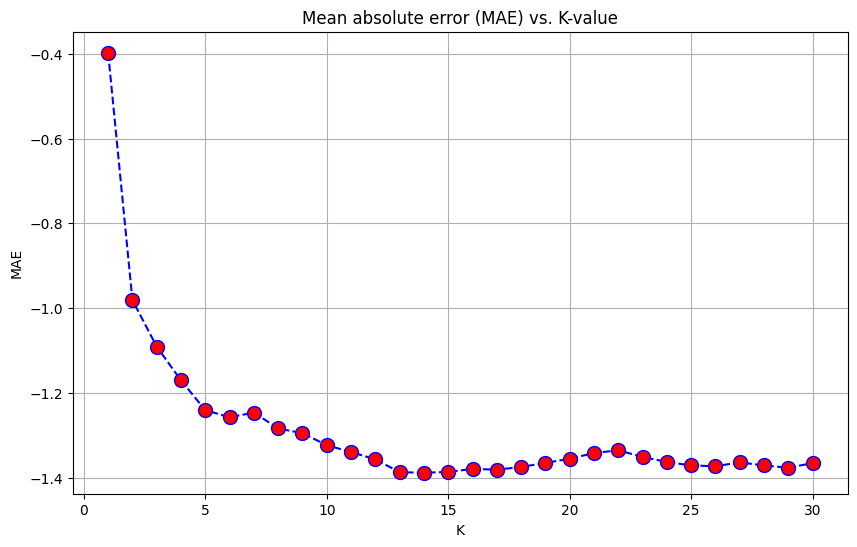

In [47]:
# plot data
plt.figure(figsize=(10,6))
plt.plot(range(1,31), reg_loo_accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Mean absolute error (MAE) vs. K-value')
plt.grid()
plt.xlabel('K')
plt.ylabel('MAE')

Text(0, 0.5, 'MAE')

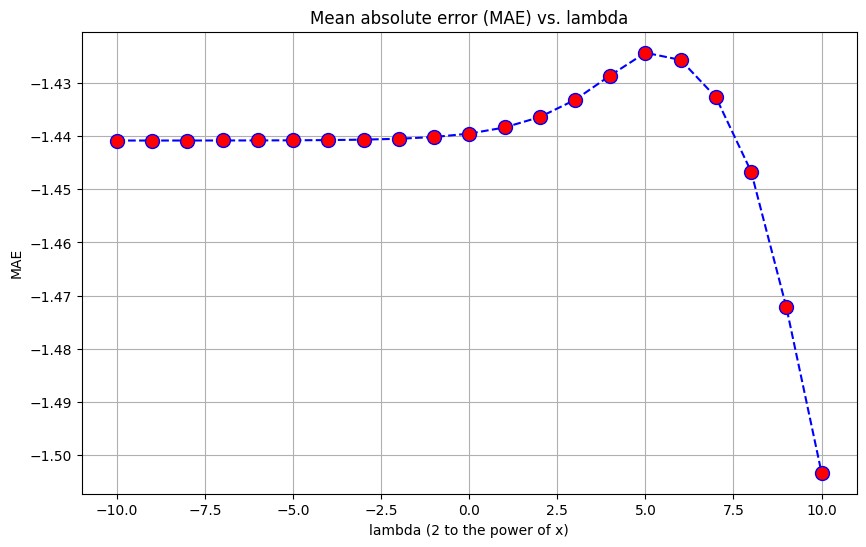

In [52]:
# plot data
plt.figure(figsize=(10,6))
plt.plot(range(-10,11), ridge_reg_loo_accuracies, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Mean absolute error (MAE) vs. lambda')
plt.grid()
plt.xlabel('lambda (2 to the power of x)')
plt.ylabel('MAE')

<font color = darkorange>I'm not sure why I'm getting negative values from the absolute error method so I'm not really sure if I can trust these graphs. I think the optimal parameters would be k=14 and lambda=2^5.

I interpret the MAE as the average absolute error of the guess to the correct value. So if the guess is 3.0 and the correct value is 1.0, the MAE would be 2.0.</font>

------

The cross-validation was employed for model selection and at this point, we have the optimal hyperparameter settings for each model. Let's finally assess both models using the test set. To continue from this, we first fit the chosen models using the entire training, ensuring that the models are trained with the maximum available data. 

**Exercise 5 D)**

Fit the chosen models with the whole training set. Evaluate the models using the test set and describe the results.

- How well did the models perform in estimating the possums' ages?
- So, what's the pitfall in here if you had compared the overall performance of the models based on the cross-validation MAEs and not the MAEs for the test set?

In [54]:
## Code - Evaluating the selected models

# k-NN model
knn_model = KNeighborsRegressor(n_neighbors=14)

# fit model
knn_model.fit(pos_features_train, pos_target_train)

# predict test set results
target_pred = knn_model.predict(pos_features_test)

# calculate mae
mae = metrics.mean_absolute_error(pos_target_test, target_pred)

print(f"K-NN MAE: {mae}\n")


# ridge model
ridge_model = Ridge(alpha=2**5)

# fit model
ridge_model.fit(pos_features_train, pos_target_train)

# predict test set results
target_pred = ridge_model.predict(pos_features_test)

# calculate mae
mae = metrics.mean_absolute_error(pos_target_test, target_pred)
print(f"Ridge MAE: {mae}\n")


K-NN MAE: 1.3554006968641115

Ridge MAE: 1.5019186423627902



<font color = darkorange>The models predicted the age quite well, with errors of below 2 years.

The pitfall is that on cross-validation evaluation, the models performed with very similar accuracy. Here we can see however, that k-nn model performed a little better.</font>

________________
## <font color = slategrey> BONUS: Feature selection - most useful features in predicting cardiovascular diseases </font>

You can stop here and get the "pass" grade! To get the "pass with honors" grade, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise is not as straightforward as the previous ones, and may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain what you did and WHY you did it.

----------------


Unfortunately, due to the lack of resources and time, doctors can't measure all the values represented in the given cardio dataset. Fortunately, eager students are willing to help: Your task is to identify <font color = slategrey>four [4] most useful features</font> for predicting the presence of the CVD from the dataset. The steps needed for this job are presented above except the feature selection part. You must remember not to leak any information from the test set when selecting the features, i.e., you try to find those five features using only the training set.

Regarding the feature selection itself, you may choose your weapon from the three categories: filter methods, embedded methods or wrapper methods. Use <font color = slategrey>two methods from two different category and compare their outputs</font>. Bonus material about the methods is provided in Moodle.

Evaluate the model of your choice with the limited dataset by examining the confusion matrix and computing the accuracy and the AUROC.

**Discuss** your findings and results.

In [22]:
## Code - Bonus task

<font color = slategrey>\<Write your answer here\></font>